# Import libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [32]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Import data

In [33]:
#define the path of the main folder
path = r'/Users/gil/Downloads/World Happiness'

In [34]:
#import combined_data_checked.csv
df_combined = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'), index_col = False)


In [35]:
df_combined.shape

(777, 16)

In [36]:
df_combined.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Year,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Government trust,Financial status,Government status,Health level
0,0,0,Switzerland,Western Europe,2015,1,7.6,1.4,1.4,0.9,0.7,0.3,0.4,Financially well-off,High government trust,Very healthy
1,1,1,Iceland,Western Europe,2015,2,7.6,1.3,1.4,1.0,0.6,0.4,0.1,Financially average,Low government trust,Very healthy
2,2,2,Denmark,Western Europe,2015,3,7.5,1.3,1.4,0.9,0.6,0.3,0.5,Financially average,High government trust,Very healthy
3,3,3,Norway,Western Europe,2015,4,7.5,1.5,1.3,0.9,0.7,0.4,0.4,Financially well-off,High government trust,Very healthy
4,4,4,Canada,North America,2015,5,7.4,1.3,1.3,0.9,0.6,0.5,0.3,Financially average,Average government trust,Very healthy


In [37]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 0'])


In [38]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 0.1'])


In [45]:
#create a subset with only numeric variables

df_subset = df_combined[['Happiness Score', 'Economy ', 'Family', 'Health', 'Government trust', 'Generosity', 'Freedom ']]

In [28]:
df_subset

,Happiness Score,Happiness Rank,Family,Health,Government trust,Generosity
0,7.6,1,1.4,0.9,0.4,0.3
1,7.6,2,1.4,1.0,0.1,0.4
2,7.5,3,1.4,0.9,0.5,0.3
3,7.5,4,1.3,0.9,0.4,0.4
4,7.4,5,1.3,0.9,0.3,0.5
...,...,...,...,...,...,...
772,3.3,152,0.7,0.6,0.4,0.2
773,3.2,153,0.9,0.5,0.2,0.3
774,3.2,154,0.5,0.4,0.0,0.2
775,3.1,155,0.0,0.1,0.0,0.2


# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [47]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [48]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 



score

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
//anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to sup

[-1287.399459459459,
 -491.3817914077097,
 -310.831160352994,
 -239.97740560291237,
 -198.29382637406215,
 -181.10575974175768,
 -166.62585072291935,
 -154.99111498747266,
 -148.42747779632776]

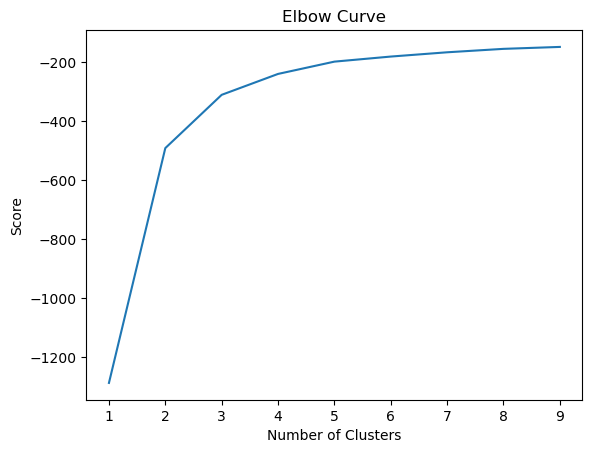

In [49]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### In this example, there's a large jump from two to three on the x-axis, and then, it only slightly increases after 3. Therefore, three is the optimal number of clusters.  

# 5.Run the k-means algorithm.


In [52]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 



# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.


In [54]:
# Fit the k-means object to the data.

kmeans.fit(df_subset)

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [55]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/4s/g64wcrgs6kjdk2rrxgv7bnsw0000gn/T/ipykernel_50566/2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [57]:
df_subset.head()

,Happiness Score,Economy,Family,Health,Government trust,Generosity,Freedom,clusters
0,7.6,1.4,1.4,0.9,0.4,0.3,0.7,1
1,7.6,1.3,1.4,1.0,0.1,0.4,0.6,1
2,7.5,1.3,1.4,0.9,0.5,0.3,0.6,1
3,7.5,1.5,1.3,0.9,0.4,0.4,0.7,1
4,7.4,1.3,1.3,0.9,0.3,0.5,0.6,1


In [58]:
#count the clusers 
df_subset['clusters'].value_counts()

2    308
0    265
1    204
Name: clusters, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

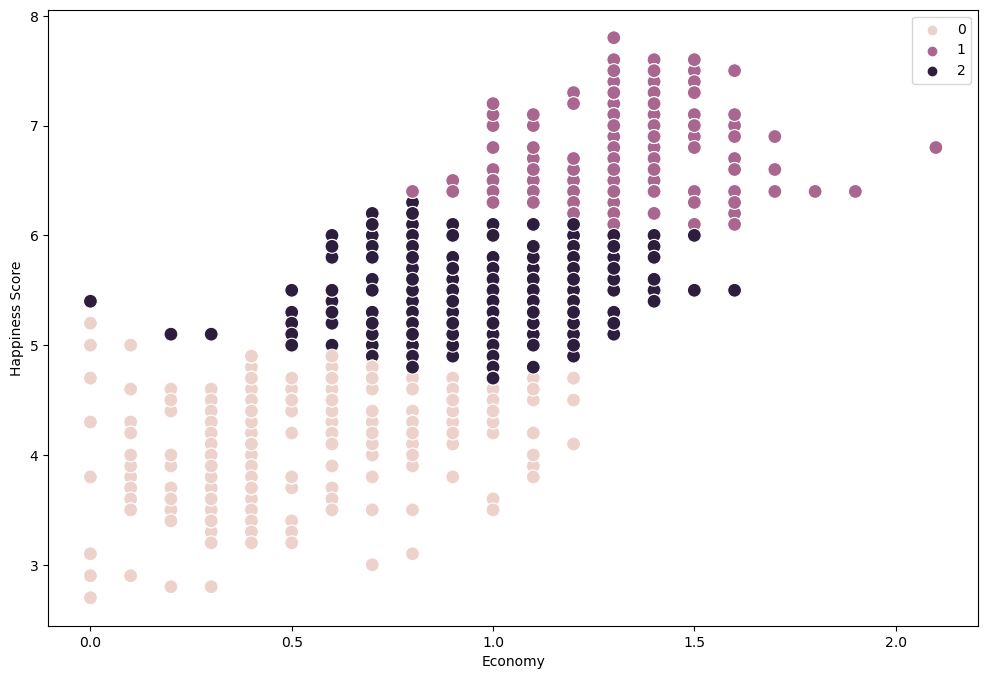

In [60]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Economy '], y=df_subset['Happiness Score'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Economy') 
plt.ylabel('Happiness Score') 
plt.show()



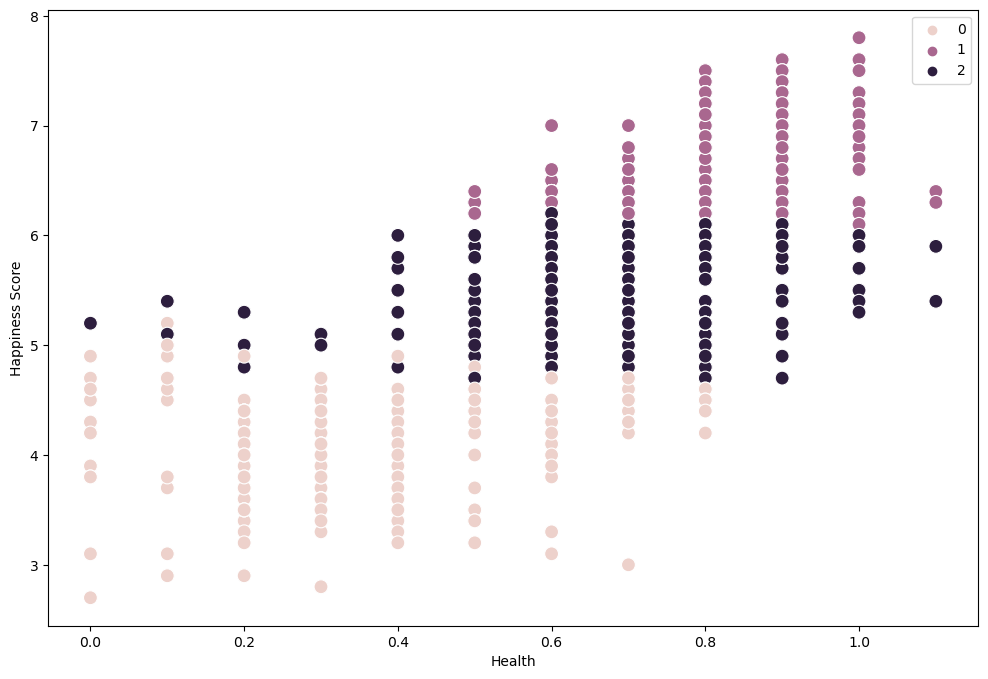

In [63]:
# Plot the clusters for the "Health" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Health'], y=df_subset['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Health') 
plt.ylabel('Happiness Score') 
plt.show()

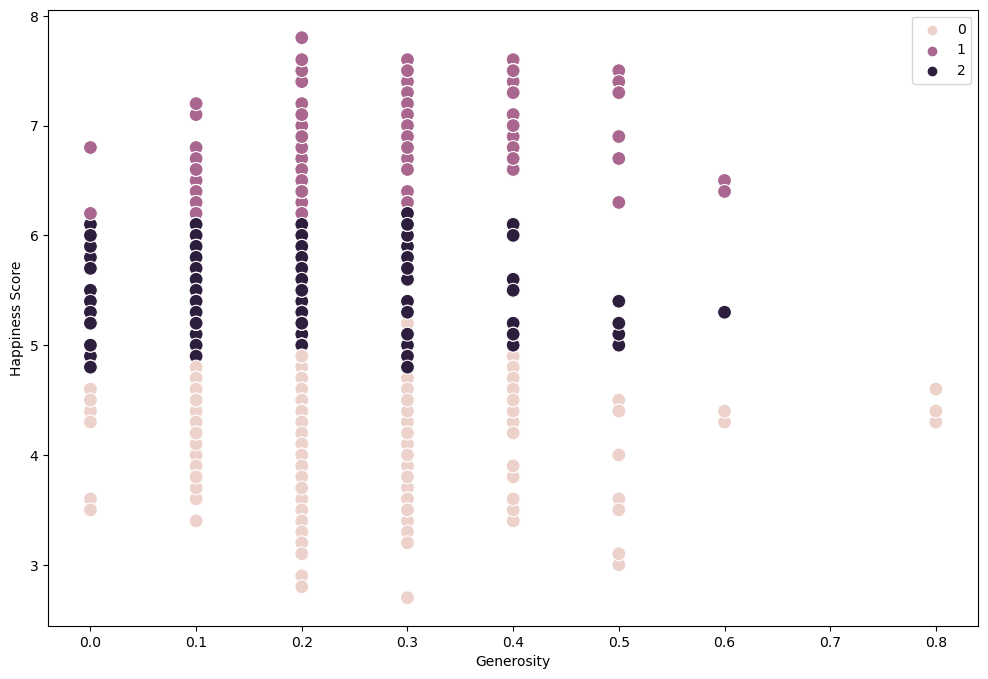

In [64]:
# Plot the clusters for the "Generosity" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Generosity'], y=df_subset['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

#### We have 3 different clusters here. The purple cluster is the cluster with the highest GDP per capita, and the highest healthiness level. This cluster is also the happiest one, followed by the dark purple cluster. The pink cluster is the cluster with the lowest GDP per capita, least happy and healthy countries. When it comes to Generosity, it seems that the clusters don't really make sense, it doesn't look like there is the same relationship as there is with the happiness score and economy/health. The hapiness score doesn't seem to have a correlation with Generosity. 




# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.


In [66]:
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/4s/g64wcrgs6kjdk2rrxgv7bnsw0000gn/T/ipykernel_50566/4144091458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'


In [67]:
df_subset.groupby('cluster').agg({
                          'Economy ':['mean', 'median'], 
                         'Health':['mean', 'median'], 
                         'Generosity':['mean', 'median'],
                          'Happiness Score':['mean', 'median']
})


Economy            Health        Generosity         \
                 mean median      mean median       mean median   
cluster                                                           
dark purple  0.989286    1.0  0.677273    0.7   0.184091    0.2   
pink         0.523774    0.5  0.371698    0.4   0.222264    0.2   
purple       1.328922    1.3  0.824510    0.8   0.268137    0.3   

            Happiness Score         
                       mean median  
cluster                             
dark purple        5.504870    5.5  
pink               4.144906    4.2  
purple             6.822549    6.8

#### The purple cluster has the highest mean and median for all variables, followed by the dark purple cluster (with an exception of Generosity), and the pink cluster. The differences between the mean and median in all of the clusters are minimal, for all variables. 

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.


#### After analyzing the scatter plots and the descriptive statistics, we can see that all the clusters behave in a pretty similar manner, the differences between the means and medians are minimal.  
I would rename the clusters based on the level of happiness (Happiest, Moderately happy, Least happy), and proceed with the analysis from there. 

In [68]:
df_combined.to_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'))